In [493]:
import pandas as pd
cla1 = pd.read_csv("weather_classification_data.csv")
cla1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


In [494]:
cla1.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


In [495]:
cla1['Season'] = cla1['Season'].astype('category')
cla1['Location'] = cla1['Location'].astype('category')
cla1['Weather Type'] = cla1['Weather Type'].astype('category')

In [496]:
distwt = cla1['Weather Type'].value_counts()
print("Distribusi Weather Type di DataFrame cla1:")
print(distwt)

Distribusi Weather Type di DataFrame cla1:
Weather Type
Cloudy    3300
Rainy     3300
Snowy     3300
Sunny     3300
Name: count, dtype: int64


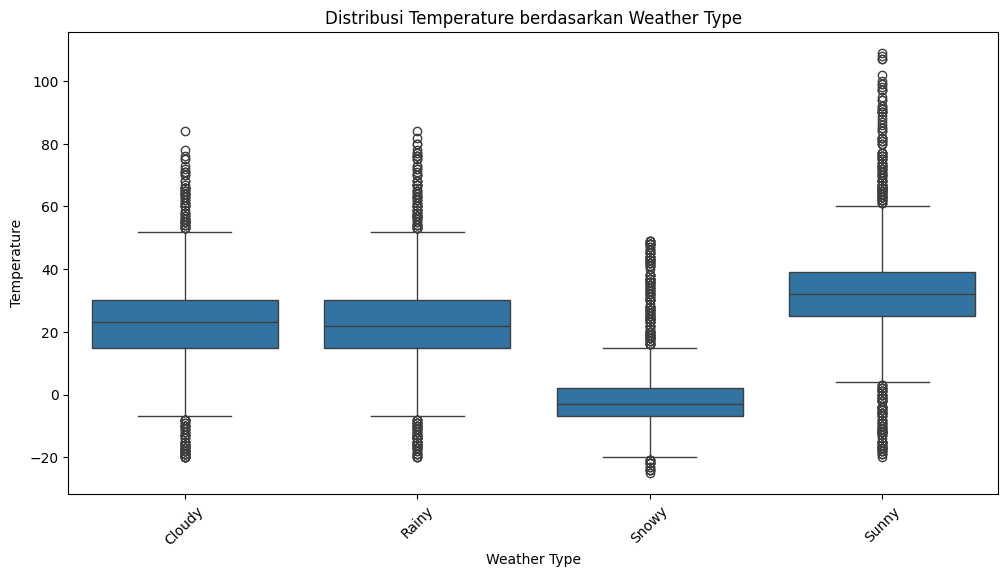

In [497]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(x='Weather Type', y='Temperature', data=cla1)
plt.title('Distribusi Temperature berdasarkan Weather Type')
plt.xticks(rotation=45)
plt.show()


In [498]:
import pandas as pd

def hapusoutlier(cla1):

    cla1a = pd.DataFrame()
    for weather_type, group in cla1.groupby('Weather Type'):
        Q1 = group['Temperature'].quantile(0.25)
        Q3 = group['Temperature'].quantile(0.75)
        IQR = Q3 - Q1
        bb = Q1 - 1.5 * IQR
        ba = Q3 + 1.5 * IQR
        hapus = group[(group['Temperature'] >= bb) & (group['Temperature'] <= ba)]
        cla1a = pd.concat([cla1a, hapus])
    return cla1a
cla1a = hapusoutlier(cla1)

<ipython-input-498-95d1db9500ad>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for weather_type, group in cla1.groupby('Weather Type'):


In [499]:
cla1a.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12517 entries, 1 to 13192
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Temperature           12517 non-null  float64 
 1   Humidity              12517 non-null  int64   
 2   Wind Speed            12517 non-null  float64 
 3   Precipitation (%)     12517 non-null  float64 
 4   Cloud Cover           12517 non-null  object  
 5   Atmospheric Pressure  12517 non-null  float64 
 6   UV Index              12517 non-null  int64   
 7   Season                12517 non-null  category
 8   Visibility (km)       12517 non-null  float64 
 9   Location              12517 non-null  category
 10  Weather Type          12517 non-null  category
dtypes: category(3), float64(5), int64(2), object(1)
memory usage: 917.3+ KB


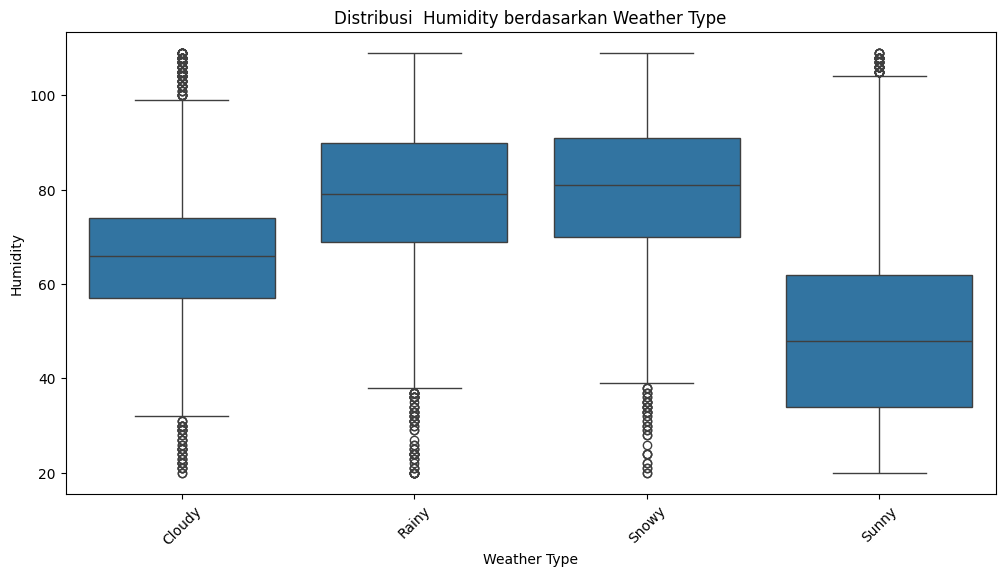

In [500]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(x='Weather Type', y='Humidity', data=cla1a)
plt.title('Distribusi  Humidity berdasarkan Weather Type')
plt.xticks(rotation=45)
plt.show()


In [501]:
import pandas as pd

def hapusoutlier(cla1a):

    cla1b = pd.DataFrame()
    for weather_type, group in cla1.groupby('Weather Type'):
        Q1a = group['Humidity'].quantile(0.25)
        Q3a = group['Humidity'].quantile(0.75)
        IQRa = Q3a - Q1a
        bba = Q1a - 1.5 * IQRa
        baa = Q3a + 1.5 * IQRa
        hapus = group[(group['Humidity'] >= bba) & (group['Humidity'] <= baa)]
        cla1b = pd.concat([cla1b, hapus])
    return cla1b
cla1b = hapusoutlier(cla1a)

<ipython-input-501-b38a8bcaf6a5>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for weather_type, group in cla1.groupby('Weather Type'):


In [502]:
import pandas as pd

def hapus_outlier_total(df):
    cla1c = pd.DataFrame()
    for weather_type, group in df.groupby('Weather Type'):
        hapus = group.copy()
        for col in ['Wind Speed', 'Precipitation (%)', 'Atmospheric Pressure', 'UV Index', 'Visibility (km)']:
            if col in hapus.columns:
                Q1b = hapus[col].quantile(0.25)
                Q3b = hapus[col].quantile(0.75)
                IQRb = Q3b - Q1b
                bbb = Q1b - 1.5 * IQRb
                bab = Q3b + 1.5 * IQRb
                hapus = hapus[(hapus[col] >= bbb) & (hapus[col] <= bab)]
        cla1c = pd.concat([cla1c, hapus])

    return cla1c
cla1c = hapus_outlier_total(cla1b)
cla1c.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10491 entries, 1 to 13192
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Temperature           10491 non-null  float64 
 1   Humidity              10491 non-null  int64   
 2   Wind Speed            10491 non-null  float64 
 3   Precipitation (%)     10491 non-null  float64 
 4   Cloud Cover           10491 non-null  object  
 5   Atmospheric Pressure  10491 non-null  float64 
 6   UV Index              10491 non-null  int64   
 7   Season                10491 non-null  category
 8   Visibility (km)       10491 non-null  float64 
 9   Location              10491 non-null  category
 10  Weather Type          10491 non-null  category
dtypes: category(3), float64(5), int64(2), object(1)
memory usage: 768.9+ KB


<ipython-input-502-cae80e80fc3e>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for weather_type, group in df.groupby('Weather Type'):


In [503]:
cla1z = cla1c.copy()

In [504]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
cla1z['Weather Type'] = label_encoder.fit_transform(cla1z['Weather Type'])
cla1y = pd.get_dummies(cla1z, columns=['Season', 'Location','Cloud Cover'], drop_first=True)
cla1y.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km),Weather Type,Season_Spring,Season_Summer,Season_Winter,Location_inland,Location_mountain,Cloud Cover_cloudy,Cloud Cover_overcast,Cloud Cover_partly cloudy
1,39.0,96,8.5,71.0,1011.43,7,10.0,0,True,False,False,True,False,False,False,True
5,32.0,55,3.5,26.0,1010.03,2,5.0,0,False,True,False,True,False,False,True,False
12,12.0,59,10.5,25.0,1016.08,3,5.5,0,False,False,False,False,True,False,False,True
15,10.0,50,6.5,46.0,1000.44,2,8.5,0,False,True,False,False,True,False,False,True
17,33.0,51,0.5,27.0,1009.18,3,5.5,0,False,False,False,False,False,False,True,False


In [505]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_features = ['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',
                      'Atmospheric Pressure', 'UV Index', 'Visibility (km)']
cla1y[numerical_features] = scaler.fit_transform(cla1y[numerical_features])
print(cla1y.head())

    Temperature  Humidity  Wind Speed  Precipitation (%)  \
1      1.389997  1.505363   -0.084579           0.734206   
5      0.919738 -0.682799   -0.998399          -0.713504   
12    -0.423859 -0.469320    0.280949          -0.745675   
15    -0.558218 -0.949648   -0.450107          -0.070077   
17     0.986918 -0.896278   -1.546691          -0.681332   

    Atmospheric Pressure  UV Index  Visibility (km)  Weather Type  \
1               0.428198  1.233360         1.978550             0   
5               0.317358 -0.346593        -0.034169             0   
12              0.796343 -0.030602         0.167103             0   
15             -0.441891 -0.346593         1.374735             0   
17              0.250063 -0.030602         0.167103             0   

    Season_Spring  Season_Summer  Season_Winter  Location_inland  \
1            True          False          False             True   
5           False           True          False             True   
12          False   

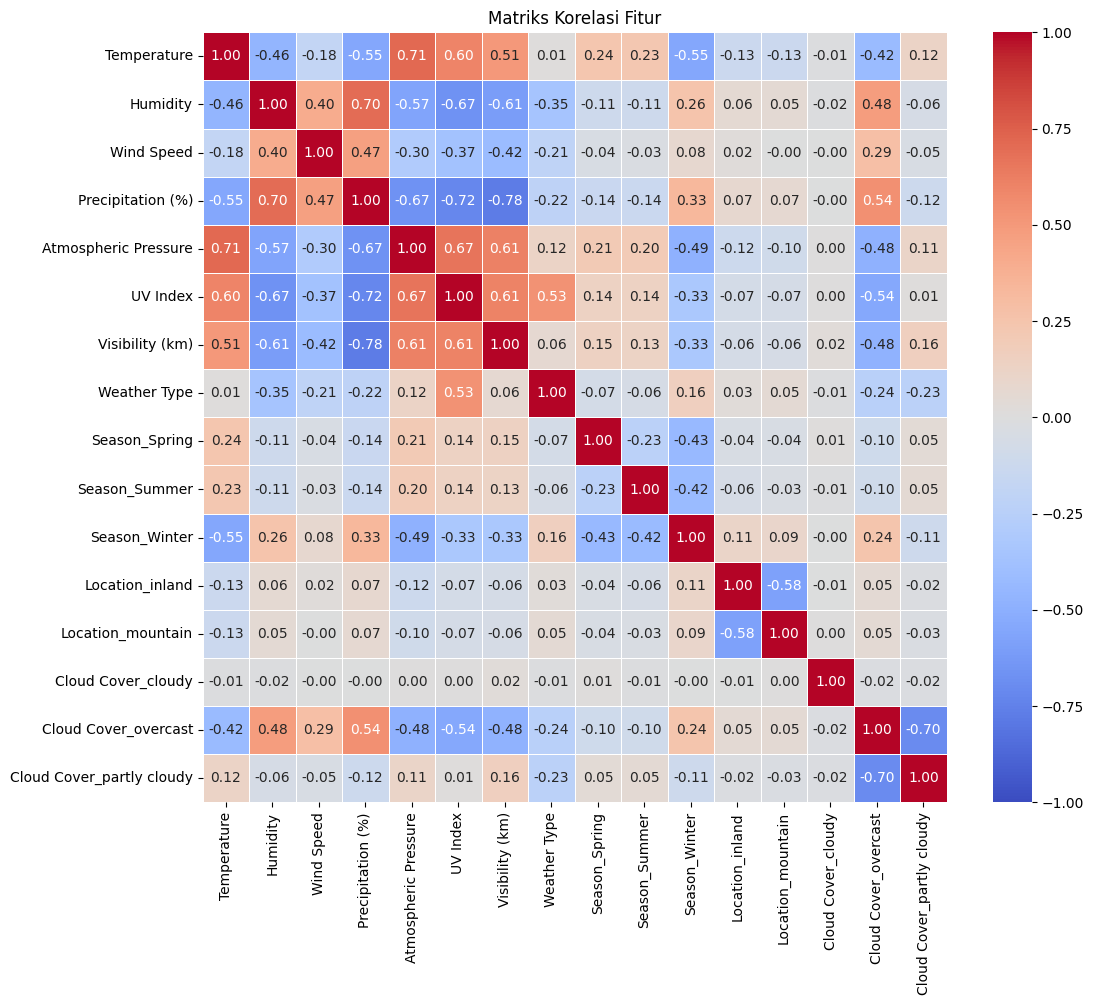

In [506]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = cla1y.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            vmin=-1, vmax=1, center=0, linewidths=0.5)
plt.title('Matriks Korelasi Fitur')
plt.show()


In [507]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

X = cla1y.drop('Weather Type', axis=1)
y = cla1y['Weather Type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(
    n_estimators=100,
    max_depth=5,
    min_samples_split=5,
    min_samples_leaf=4,
    random_state=42
)

model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))

Accuracy: 0.9980943306336351
Confusion Matrix:
 [[527   3   0   1]
 [  0 565   0   0]
 [  0   0 518   0]
 [  0   0   0 485]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       531
           1       0.99      1.00      1.00       565
           2       1.00      1.00      1.00       518
           3       1.00      1.00      1.00       485

    accuracy                           1.00      2099
   macro avg       1.00      1.00      1.00      2099
weighted avg       1.00      1.00      1.00      2099



In [508]:
print("Training Data Performance")
print(f"Accuracy: {accuracy_score(y_train, y_train_pred):.4f}")
print(classification_report(y_train, y_train_pred))

print("Testing Data Performance")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")
print(classification_report(y_test, y_test_pred))

Training Data Performance
Accuracy: 0.9981
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      2065
           1       0.99      1.00      1.00      2146
           2       1.00      1.00      1.00      2129
           3       1.00      1.00      1.00      2052

    accuracy                           1.00      8392
   macro avg       1.00      1.00      1.00      8392
weighted avg       1.00      1.00      1.00      8392

Testing Data Performance
Accuracy: 0.9981
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       531
           1       0.99      1.00      1.00       565
           2       1.00      1.00      1.00       518
           3       1.00      1.00      1.00       485

    accuracy                           1.00      2099
   macro avg       1.00      1.00      1.00      2099
weighted avg       1.00      1.00      1.00      2099

